In [1]:
# import librarys
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv')
df.head()

,Unnamed: 0,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated,URLs
0,0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...
1,1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...
2,2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosse...
3,3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stor...
4,4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Wil...


In [3]:
df.tail()

,Unnamed: 0,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated,URLs
7923,7923,Insight Guides Poland (Travel Guide with Free ...,Insight Travel Guide,Travel,Travel & Holiday Guides,Paperback,"₹1,326.00",4.7,16.0,https://www.amazon.in/Insight-Guides-Poland-Tr...
7924,7924,Lonely Planet India 19 (Travel Guide),Anirban Mahapatra,Travel,Travel & Holiday Guides,Paperback,₹850.00,4.4,187.0,https://www.amazon.in/Lonely-Planet-India-Trav...
7925,7925,Eyewitness Travel Phrase Book French (EW Trave...,DK,Travel,Travel & Holiday Guides,Paperback,₹307.00,4.5,168.0,https://www.amazon.in/Eyewitness-Travel-Phrase...
7926,7926,Lonely Planet Australia (Travel Guide),Andrew Bain,Travel,Travel & Holiday Guides,Kindle Edition,"₹1,814.50",4.7,267.0,https://www.amazon.in/Lonely-Planet-Australia-...
7927,7927,Political Map of India Latest Map of India Wit...,Wonder House Books,Travel,Travel & Holiday Guides,Poster,₹99.00,3.9,48.0,https://www.amazon.in/Political-Map-India-Terr...


# data cleaning

In [4]:
df.columns

Index(['Unnamed: 0', 'Title', 'Author', 'Main Genre', 'Sub Genre', 'Type',
       'Price', 'Rating', 'No. of People rated', 'URLs'],
      dtype='object')

In [5]:
col_drob=['Unnamed: 0','Sub Genre','URLs','No. of People rated']
df.drop(col_drob,inplace=True,axis=1)
df.head()

,Title,Author,Main Genre,Type,Price,Rating
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Paperback,₹169.00,4.4
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Paperback,₹99.00,4.5
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Kindle Edition,₹175.75,4.6
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Paperback,₹389.00,4.6
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Paperback,₹348.16,4.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       7928 non-null   object 
 1   Author      7907 non-null   object 
 2   Main Genre  7928 non-null   object 
 3   Type        7928 non-null   object 
 4   Price       7928 non-null   object 
 5   Rating      7928 non-null   float64
dtypes: float64(1), object(5)
memory usage: 371.8+ KB


Remove the currency symbol


In [7]:
df['Price']=df['Price'].str.replace(',','')

In [8]:
df['Price']=df['Price'].str.replace('₹','')
df.head()

,Title,Author,Main Genre,Type,Price,Rating
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Paperback,169.00,4.4
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Paperback,99.00,4.5
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Kindle Edition,175.75,4.6
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Paperback,389.00,4.6
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Paperback,348.16,4.5


In [9]:
#convert to float
df['Price']=df['Price'].astype(float)


In [10]:
# convert 'Price' from Indian Rupees to Saudi riyal
exchange_rate =0.045

df['Price_riyal']=df['Price']*exchange_rate
df.head()



,Title,Author,Main Genre,Type,Price,Rating,Price_riyal
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Paperback,169.00,4.4,7.60500
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Paperback,99.00,4.5,4.45500
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Kindle Edition,175.75,4.6,7.90875
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Paperback,389.00,4.6,17.50500
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Paperback,348.16,4.5,15.66720


In [11]:
df.drop('Price',inplace=True,axis=1)
df.head()

,Title,Author,Main Genre,Type,Rating,Price_riyal
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Paperback,4.4,7.60500
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Paperback,4.5,4.45500
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Kindle Edition,4.6,7.90875
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Paperback,4.6,17.50500
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Paperback,4.5,15.66720


In [12]:
df.isnull().sum()

Title           0
Author         21
Main Genre      0
Type            0
Rating          0
Price_riyal     0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.describe()

,Rating,Price_riyal
count,7907.000000,7907.000000
mean,4.260048,22.188751
std,0.911732,42.618561
min,0.000000,0.000450
25%,4.300000,8.730000
50%,4.500000,14.310000
75%,4.600000,20.887650
max,5.000000,1612.305000


# Visualize the data¶


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


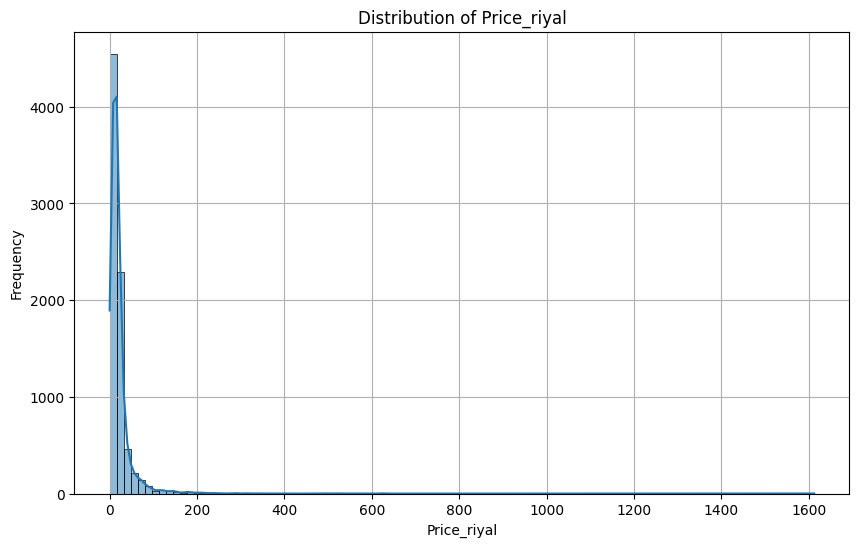

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_riyal'], bins=100,kde=True)
plt.grid()
plt.title('Distribution of Price_riyal')
plt.xlabel('Price_riyal')
plt.ylabel('Frequency')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


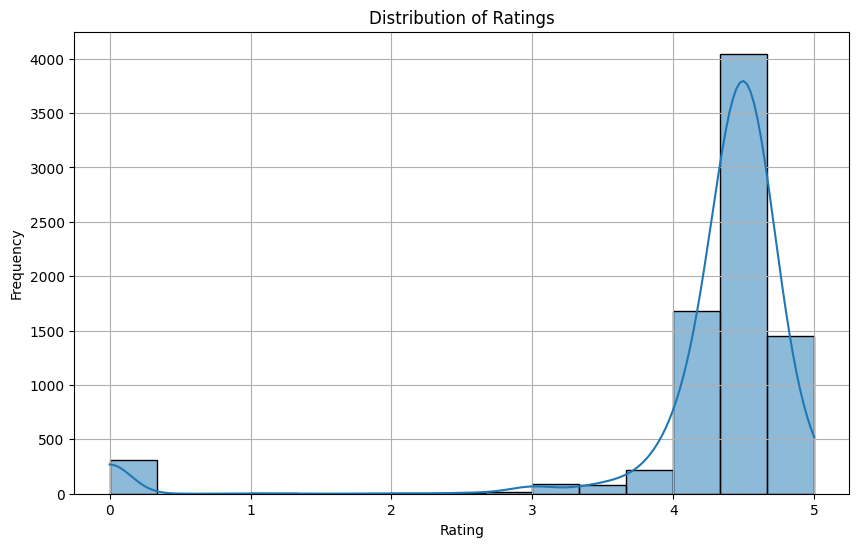

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=15,kde=True)
plt.grid()
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [17]:
top5=df.sort_values(by='Price_riyal',ascending=False).head(5)
top5

,Title,Author,Main Genre,Type,Rating,Price_riyal
2145,Distributed Computing and Artificial Intellige...,Sigeru Omatu,"Computing, Internet & Digital Media",Paperback,5.0,1612.3050
4198,BRENNER & RECTOR'S THE KIDNEY 02 VOL SET,Alan S. L. Yu MD,Medicine & Health Sciences,Hardcover,4.7,1317.6000
4178,"Webb, Müller and Naidich's High-Resolution CT ...",Sujal Desai,Medicine & Health Sciences,Hardcover,4.0,1192.4982
4148,Autism Spectrum Disorder: Bioregenerative Medi...,Dr Chan,Medicine & Health Sciences,Paperback,0.0,669.8250
2944,PMP Exam Prep Simplified: Covers the Current P...,Andrew Ramdayal,Exam Preparation,Paperback,4.6,624.9150


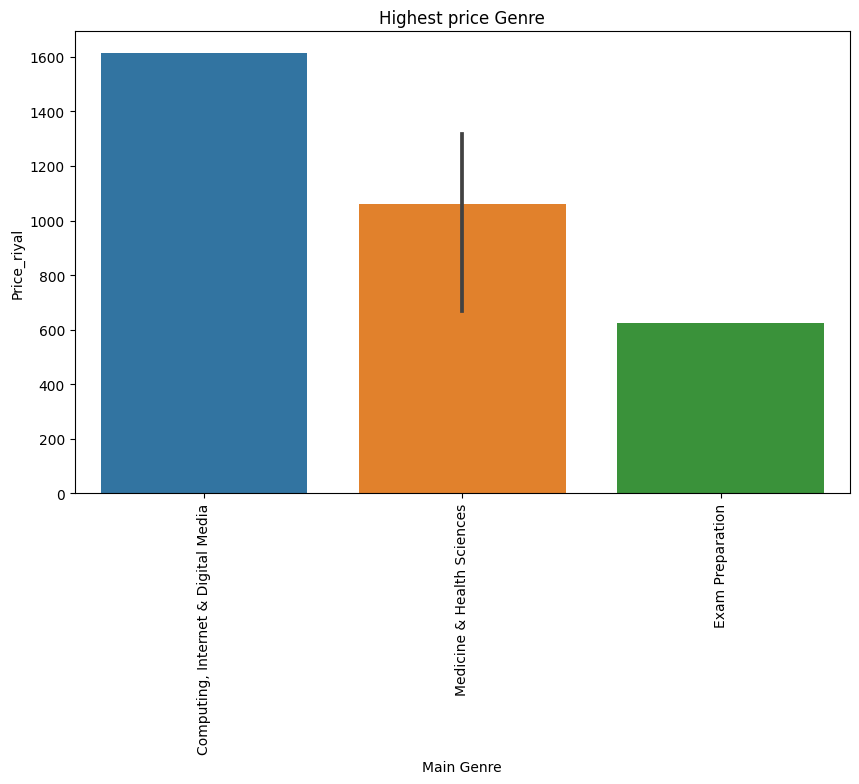

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top5['Main Genre'],y=top5['Price_riyal'])
plt.xticks(rotation=90)
plt.title('Highest price Genre')
plt.show()

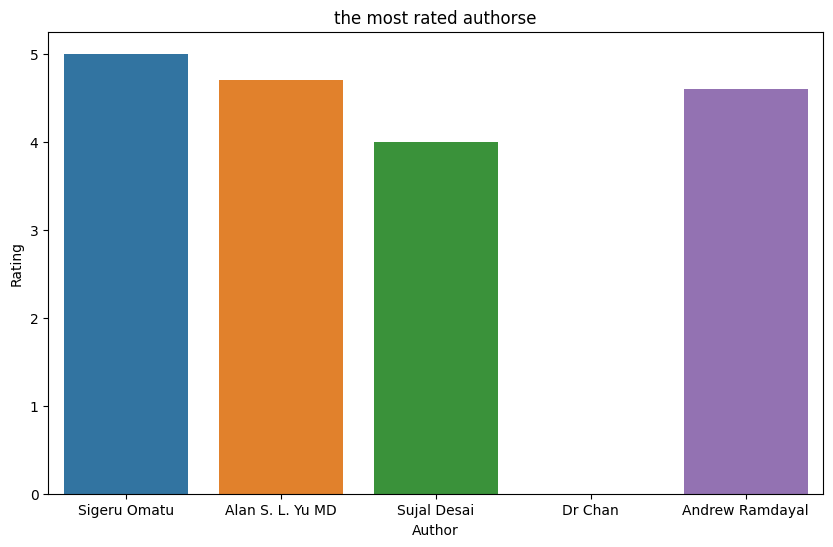

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top5['Author'],y=top5['Rating'])
plt.title('the most rated authorse')
plt.xlabel('Author')
plt.ylabel('Rating')
plt.show()

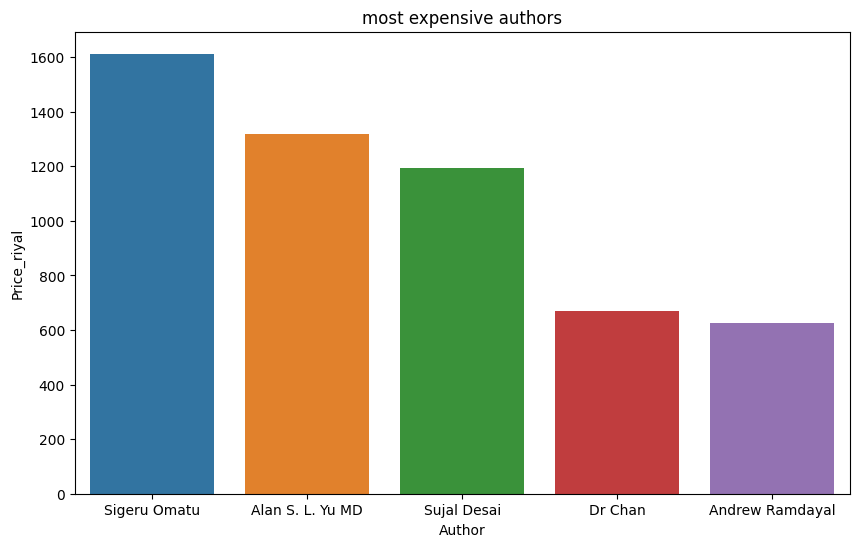

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top5['Author'],y=top5['Price_riyal'])
plt.title('most expensive authors')
plt.xlabel('Author')
plt.ylabel('Price_riyal')
plt.show()

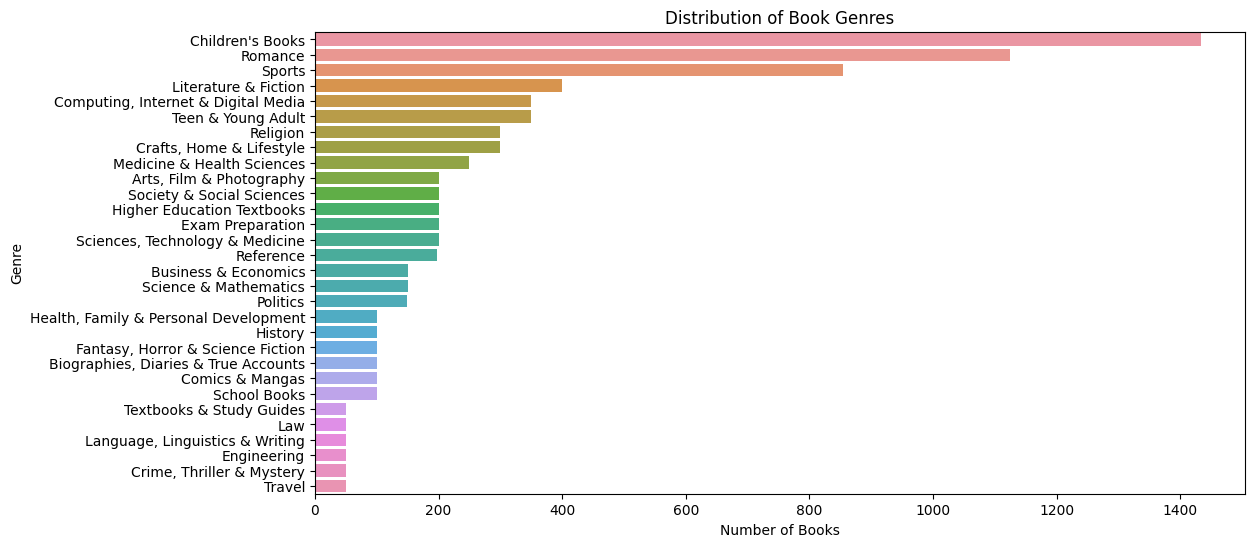

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Main Genre', data=df, order=df['Main Genre'].value_counts().index)
plt.title('Distribution of Book Genres')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()

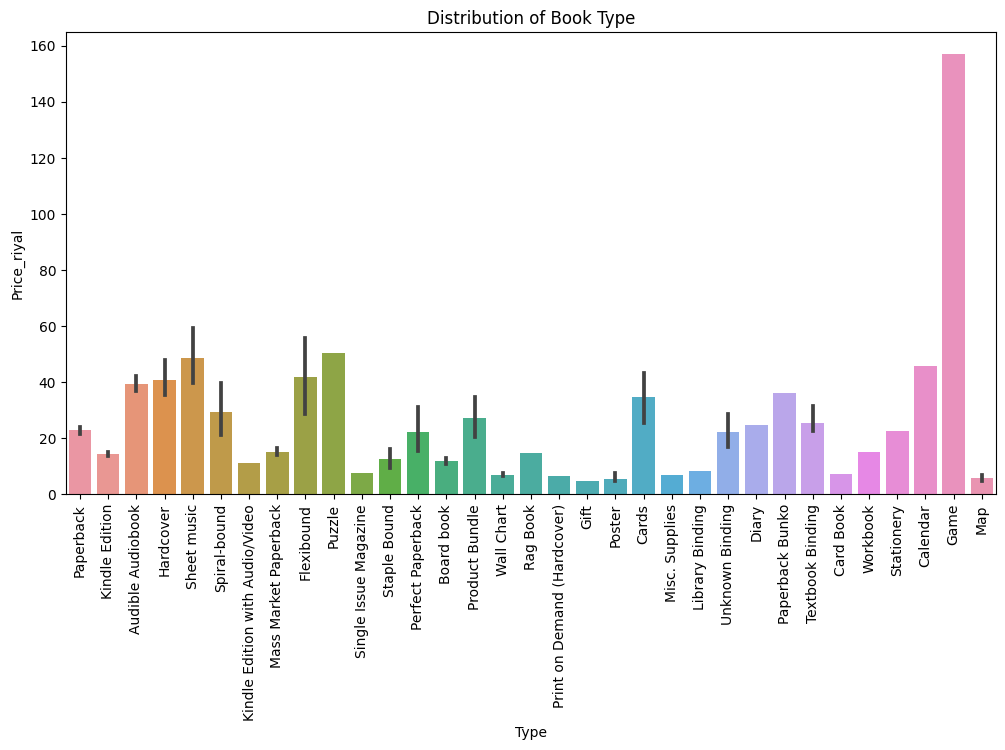

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Type',y='Price_riyal',data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Book Type')
plt.xlabel('Type')
plt.ylabel('Price_riyal')
plt.show()

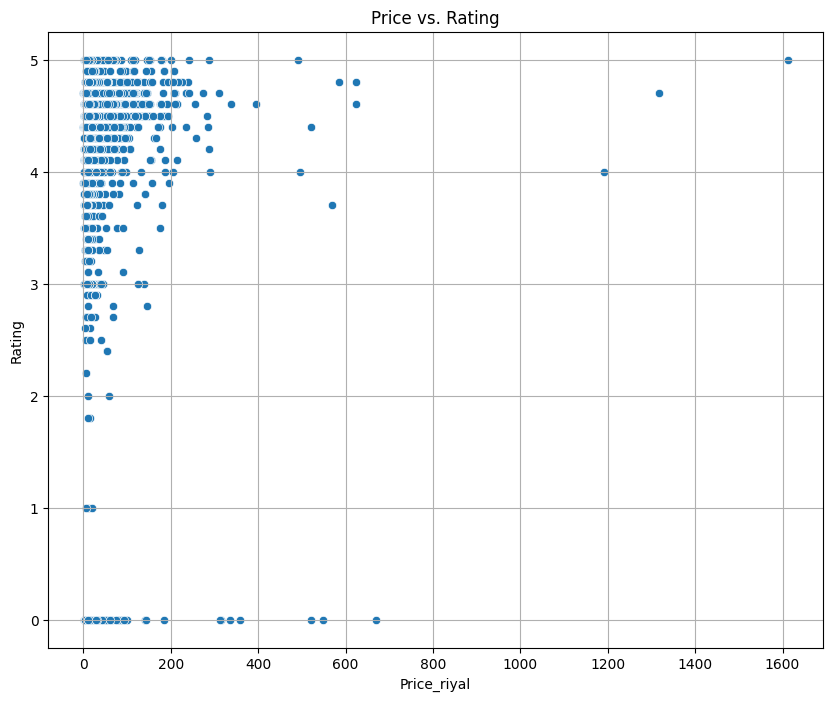

In [23]:
# Set the figure size
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Price_riyal',y='Rating',data=df)
plt.title('Price vs. Rating')
plt.xlabel('Price_riyal')
plt.grid()
plt.ylabel('Rating')
plt.show()